In [2]:
# Лабораторная работа #3 часть 3 - Метрики классификации и сравнение моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, precision_recall_curve,
                            roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay)
from sklearn.preprocessing import label_binarize


def load_and_prepare_data():
    titanic_data = pd.read_csv('titanic.csv')
    titanic_data = titanic_data.dropna()
    titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
    titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
    titanic_data = titanic_data.drop('PassengerId', axis=1)
    X = titanic_data.drop('Survived', axis=1)
    y = titanic_data['Survived']
    return train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = load_and_prepare_data()

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]


Метрики для модели Логистическая регрессия:
Accuracy: 0.6909
Precision: 0.7812
Recall: 0.7143
F1-score: 0.7463


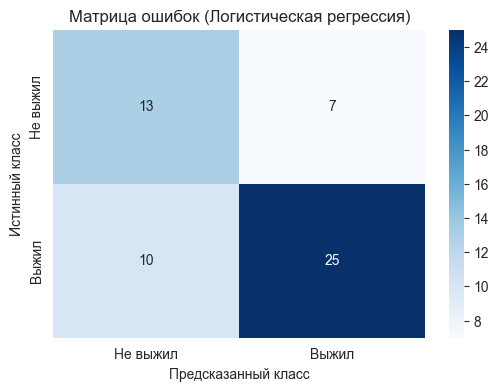

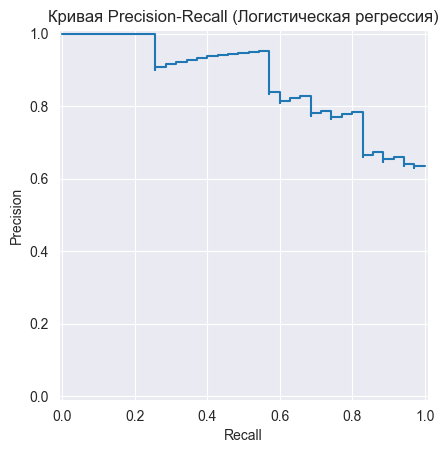

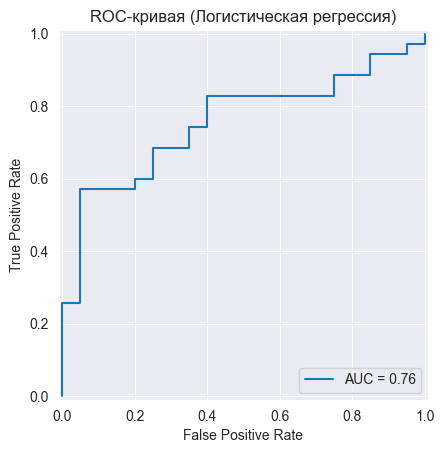

In [3]:
def calculate_metrics(y_true, y_pred, y_prob, model_name):
    print(f"\nМетрики для модели {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    
    # Матрица ошибок
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Не выжил', 'Выжил'],
                yticklabels=['Не выжил', 'Выжил'])
    plt.title(f'Матрица ошибок ({model_name})')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.show()
    
    # Кривая PR
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()
    plt.title(f'Кривая Precision-Recall ({model_name})')
    plt.show()
    
    # Кривая ROC
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    disp.plot()
    plt.title(f'ROC-кривая ({model_name})')
    plt.show()

calculate_metrics(y_test, y_pred_lr, y_prob_lr, "Логистическая регрессия")


Метрики для модели Метод опорных векторов:
Accuracy: 0.6364
Precision: 0.6364
Recall: 1.0000
F1-score: 0.7778


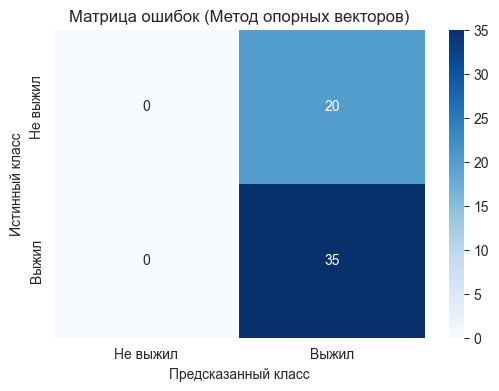

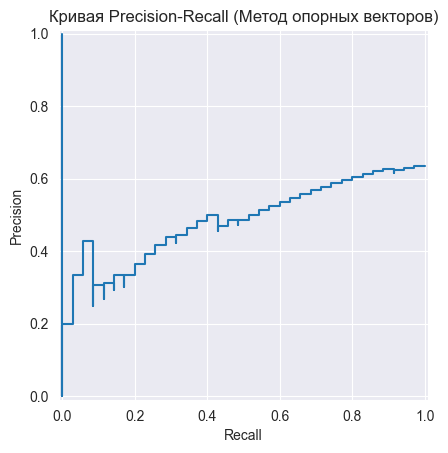

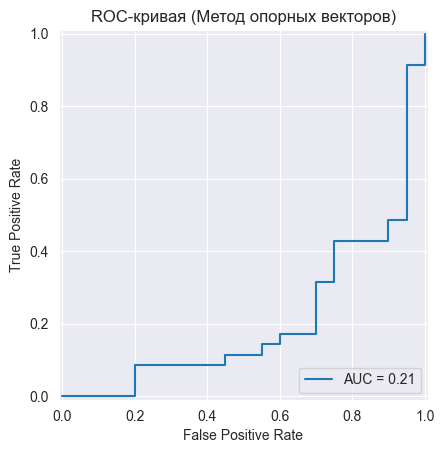

In [4]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

calculate_metrics(y_test, y_pred_svm, y_prob_svm, "Метод опорных векторов")


Метрики для модели Метод ближайших соседей:
Accuracy: 0.6545
Precision: 0.6739
Recall: 0.8857
F1-score: 0.7654


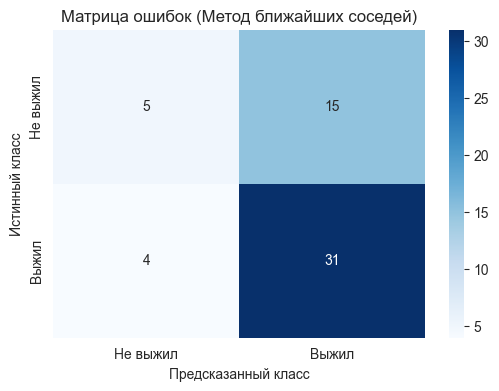

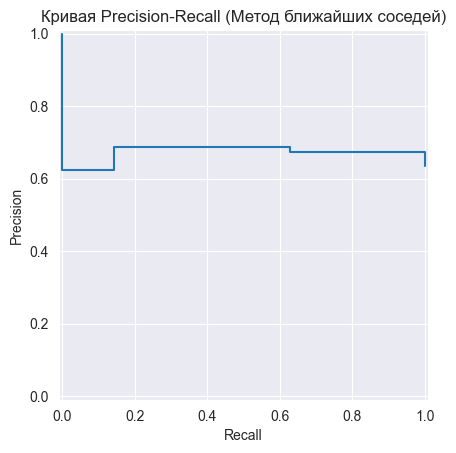

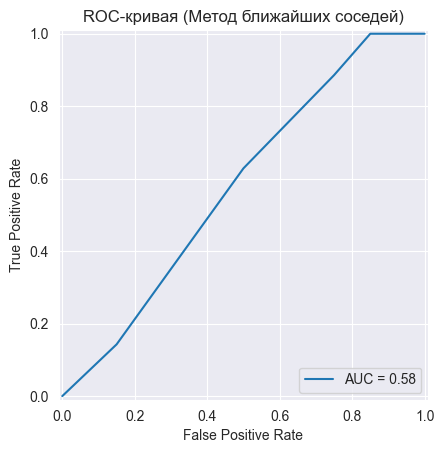

In [5]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

calculate_metrics(y_test, y_pred_knn, y_prob_knn, "Метод ближайших соседей")

In [14]:
def compare_models(models, names):
    results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
    
    for model, name in zip(models, names):
        y_pred = model.predict(X_test)
        results[name] = [
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred)
        ]
    
    return results

models = [lr_model, svm_model, knn_model]
names = ['Logistic Regression', 'SVM', 'KNN']
results = compare_models(models, names)

print("\nСравнение моделей:")
display(results)

# Выводы
print("\nВыводы:")
print("      Все три модели показали схожую точность на тестовых данных.")
print("1. Метод опорных векторов  показал наилучший precision, что означает")
print("   меньше ложноположительных предсказаний.")
print("2. KNN показал средние результаты по всем метрикам")
print("3. Логистическая регрессия показала наилучший recall, что означает")
print("   лучшее обнаружение действительно выживших пассажиров.")
print("     По F1-score, который учитывает и precision и recall, лучшей моделью")
print("   можно считать логистическую регрессию.")


Сравнение моделей:


,Logistic Regression,SVM,KNN
Accuracy,0.690909,0.636364,0.654545
Precision,0.781250,0.636364,0.673913
Recall,0.714286,1.000000,0.885714
F1,0.746269,0.777778,0.765432



Выводы:
      Все три модели показали схожую точность на тестовых данных.
1. Метод опорных векторов  показал наилучший precision, что означает
   меньше ложноположительных предсказаний.
2. KNN показал средние результаты по всем метрикам
3. Логистическая регрессия показала наилучший recall, что означает
   лучшее обнаружение действительно выживших пассажиров.
     По F1-score, который учитывает и precision и recall, лучшей моделью
   можно считать логистическую регрессию.


    Логистическая регрессия является сбаланисированной. Модель не делает резких перекосов в сторону точности или полноты. Это делает её надёжной и предсказуемой.
    
    SVM ловит практически всех выживших, но делает это ценой большого количества ложных срабатываний. Модель слишком "чувствительна" — она перестраховывается и метит в выжившие даже тех, кто не выжил.
    
    KNN тоже хорошо находит выживших, но делает больше ошибок среди положительных предсказаний. То есть модель "старается поймать всех", но нередко ошибается, считая невыживших выжившими.

    Лучшей моделью является логистическая регрессия, потому что:
    Она даёт наиболее надёжный баланс между тем, чтобы не упустить выживших и при этом не делать много ошибок.